In [1]:
#pip install openai==0.28
#pip install pyvis

In [2]:
import os
import networkx as nx
import openai
from pyvis.network import Network
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns

In [4]:
os.environ['OPENAI_API_KEY'] = ''
openai.api_key = os.getenv('OPENAI_API_KEY')

In [5]:
def get_chat_gpt(query):
    response = openai.ChatCompletion.create(
        messages=[
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return response.choices[0].message.content
    
def get_influencers_and_influencees(artist_name):
    # influencers_query = f"Please provide a list of the full names without special characters of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    #influencees_query = f"Please provide a list of the full names without special characters of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    influencers_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who influenced {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """
    influencees_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who are influenced by {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """    

    
    influencers = get_chat_gpt(influencers_query)
    influencees = get_chat_gpt(influencees_query)
    return influencers, influencees

In [6]:
get_influencers_and_influencees('Immanuel Kant')

('Rene Descartes, John Locke, David Hume, Moses Mendelssohn, Jean-Jacques Rousseau',
 'Friedrich Nietzsche, Arthur Schopenhauer, Georg Wilhelm Friedrich Hegel, John Rawls, Karl Jaspers.')

In [7]:
get_influencers_and_influencees('Immanuel Kant')

('Plato, Francis Bacon, Rene Descartes, David Hume, Jean-Jacques Rousseau',
 'Anne Conway, Johann Wolfgang von Goethe, Friedrich Nietzsche, Karl Wilhelm Friedrich Schlegel, Ralph Waldo Emerson.')

In [9]:
artists = ["Claude Monet", "Vincent van Gogh", "Pablo Picasso", "Salvador Dalí", "Georgia O'Keeffe"]
artists = ["Sigmund Freud"]

# Collect data for each artist
artist_influence_data = {}
for artist in artists:
    influencers, influencees = get_influencers_and_influencees(artist)
    artist_influence_data[artist] = {
        "influencers": influencers,
        "influencees": influencees
    }

In [10]:
artist_influence_data

{'Sigmund Freud': {'influencers': 'Gustav Klimt, Friedrich Nietzsche, Jean-Martin Charcot, Johann Wolfgang von Goethe, Martha Bernays',
  'influencees': 'Frieda Fromm-Reichmann, Carl Jung, Karen Horney, Jacques Lacan, Melanie Klein'}}

In [11]:
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"].split(','):
            influencer = influencer.strip()
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"].split(','):
            influencee = influencee.strip()
            if influencee:
                G.add_edge(artist, influencee)
    return G

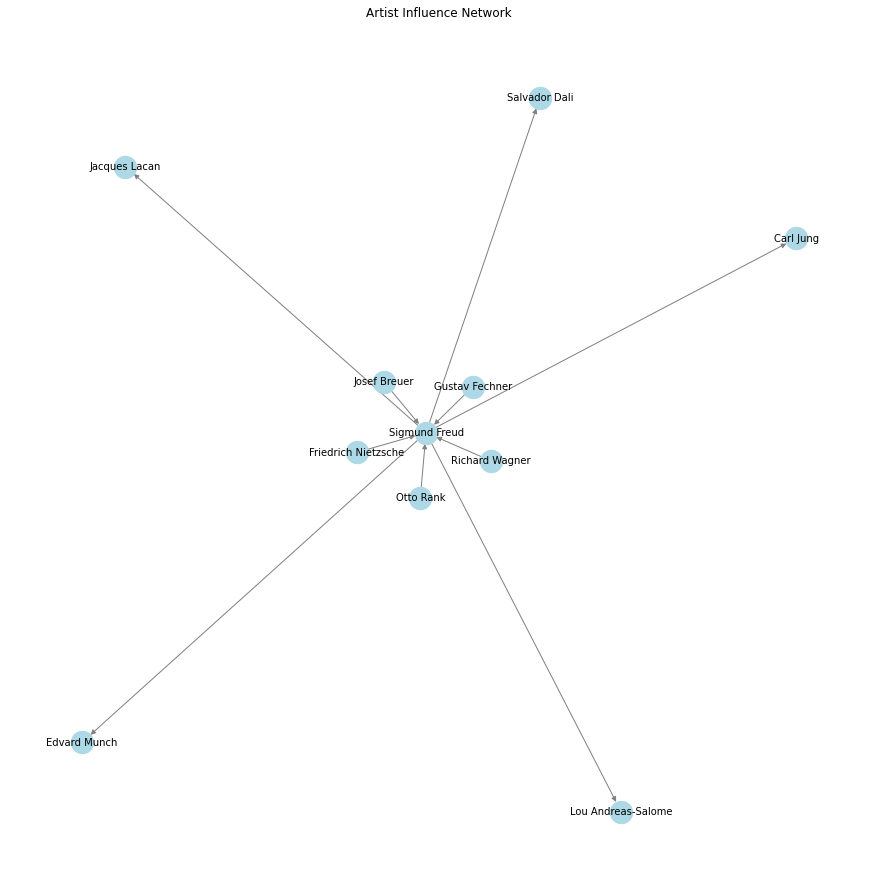

In [25]:
G = create_a_directed_graph(artist_influence_data)
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color='lightblue', edge_color='gray')
plt.title("Artist Influence Network")
plt.show()

In [26]:
#Now: do 3 loops 

In [74]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}

for i in range(3):
    new_artists = set()
    for artist in artists_to_process:
        influencers, influencees = get_influencers_and_influencees(artist)
        for influencer in influencers.split(","):
            new_artists.add(influencer.strip()) 
        for influencee in influencees.split(","):
            new_artists.add(influencee.strip()) 
        artist_influence_data[artist] = {
            "influencers": influencers,
            "influencees": influencees
        }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

ValueError: too many values to unpack (expected 2)

In [ ]:
G = create_a_directed_graph(artist_influence_data)

# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True

# Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

In [8]:
def clean_response(response):
    cleaned_response = [re.sub(r'[^A-Za-z\s]', '', word).strip().lower() for word in response.split(",")]
    return cleaned_response

def get_influencers_and_influencees(artist_name):
    # influencers_query = f"Please provide a list of the full names without special characters of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    #influencees_query = f"Please provide a list of the full names without special characters of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    influencers_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who influenced {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Make sure that the incluencer is older than {artist_name}. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """
    influencees_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who are influenced by {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Make sure that the incluencer is younger than {artist_name}. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """   
    events_query = f"""Provide the top three most important historical events (not philosophies) or environmental factors (described in one or two words) that influenced {artist_name}. 
    Some examples of such events are war, industrial revolution, french revolution ands artistic movement.
    Some wrong examples are Rousseau's philosophy and Mozart's music.
    People are not events, so don't return them. 
    Exlude events that are not that significant. 
    Try to make the examples as condense as possible. 
    Only return the examples that had a major influence. 
    Put the events in a list separated by a comma. Avoid numbers, dashes, enumerations and lists. 
    """  

    
    influencers = clean_response(get_chat_gpt(influencers_query))
    influencees = clean_response(get_chat_gpt(influencees_query))
    influencing_events = clean_response(get_chat_gpt(events_query))
    return influencers, influencees, influencing_events




In [124]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}
node_types = dict()


for i in range(3):
    new_artists = set()
    for artist in artists_to_process:
        if not artist in artists_processed:
            influencers, influencees, influencing_events = get_influencers_and_influencees(artist)
            for influencer in influencers:
                new_artists.add(influencer) 
            for influencee in influencees:
                new_artists.add(influencee) 
            for event in influencing_events:
                node_types[event] = "event"            
            artist_influence_data[artist] = {
                "influencers": influencers,
                "influencees": influencees, 
                "influencing_events": influencing_events
            }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

In [125]:
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"]:
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"]:
            if influencee:
                G.add_edge(artist, influencee)
        # Add edges for influencing events
        for event in influences["influencing_events"]:
            if event:
                G.add_edge(event, artist)
    return G
G = create_a_directed_graph(artist_influence_data)

# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True


# Add nodes with different colors based on their type
for node in G.nodes():
    node_type = node_types.get(node, 'unknown')  # Default to 'unknown' if type is not provided
    if node_type == 'event':
        color = 'green'
    else:
        color = 'blue'  # For unknown types

    net.add_node(node, label=node, color=color)
    

# Add edges to the PyVis network
for source, target in G.edges():
    net.add_edge(source, target)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

directed_graph.html


In [18]:
# hub metric evaluation 
import numpy as np

def evaluate_hub_metrics(G):
    # Check if the graph is directed
    if not G.is_directed():
        raise ValueError("The graph must be directed to evaluate hub metrics.")
    
    # Degree Centrality
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    
    # Eigenvector Centrality
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    except nx.PowerIterationFailedConvergence as e:
        print("Warning: Eigenvector centrality did not converge. Returning None for eigenvector centrality.")
        eigenvector_centrality = None
    
    # HITS (Hyperlink-Induced Topic Search) algorithm
    try:
        hubs, authorities = nx.hits(G, max_iter=1000)
    except nx.PowerIterationFailedConvergence as e:
        print("Warning: HITS algorithm did not converge. Returning None for HITS.")
        hubs, authorities = None, None
    
    # Display results
    print("Degree Centrality (In-Degree):")
    for node, centrality in in_degree_centrality.items():
        print(f"Node {node}: {centrality:.4f}")
    
    print("\nDegree Centrality (Out-Degree):")
    for node, centrality in out_degree_centrality.items():
        print(f"Node {node}: {centrality:.4f}")
    
    if eigenvector_centrality:
        print("\nEigenvector Centrality:")
        for node, centrality in eigenvector_centrality.items():
            print(f"Node {node}: {centrality:.4f}")
    
    if hubs:
        print("\nHITS Hub Scores:")
        for node, score in hubs.items():
            print(f"Node {node}: {score:.4f}")
    
    if authorities:
        print("\nHITS Authority Scores:")
        for node, score in authorities.items():
            print(f"Node {node}: {score:.4f}")




# Evaluate hub metrics
evaluate_hub_metrics(G)

Degree Centrality (In-Degree):
Node Sigmund Freud: 0.0176
Node leonardo da vinci: 0.0264
Node friedrich nietzsche: 0.0485
Node jeanmartin charcot: 0.0176
Node gustav klimt: 0.0176
Node josef breuer: 0.0176
Node anna freud: 0.0242
Node carl jung: 0.0330
Node jacques lacan: 0.0264
Node darian leader: 0.0198
Node slavoj zizek: 0.0286
Node world war i: 0.0000
Node victorian era: 0.0000
Node industrial revolution: 0.0000
Node arthur schopenhauer: 0.0198
Node richard wagner: 0.0176
Node sren kierkegaard: 0.0000
Node friedrich schiller: 0.0176
Node fyodor dostoevsky: 0.0198
Node lou andreassalom: 0.0198
Node georges bataille: 0.0044
Node michel foucault: 0.0264
Node ayn rand: 0.0176
Node prussian militarism: 0.0000
Node greek philosophy: 0.0000
Node wagnerian music: 0.0000
Node leon battista alberti: 0.0176
Node sandro botticelli: 0.0242
Node donatello: 0.0176
Node piero della francesca: 0.0176
Node filippo brunelleschi: 0.0176
Node michelangelo buonarroti: 0.0242
Node raphael sanzio: 0.0220


In [19]:
# Calculate PageRank
pagerank_scores = nx.pagerank(G)
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)


# Display sorted PageRank scores
print("Nodes sorted by PageRank scores:")
for node, score in sorted_pagerank:
    print(f"Node: {node}, PageRank Score: {score:.4f}")

Nodes sorted by PageRank scores:
Node: frida kahlo, PageRank Score: 0.0168
Node: friedrich nietzsche, PageRank Score: 0.0158
Node: sigmund freud, PageRank Score: 0.0153
Node: simone de beauvoir, PageRank Score: 0.0140
Node: leonardo da vinci, PageRank Score: 0.0125
Node: slavoj zizek, PageRank Score: 0.0120
Node: marina abramovic, PageRank Score: 0.0120
Node: carl jung, PageRank Score: 0.0106
Node: judith butler, PageRank Score: 0.0104
Node: michel foucault, PageRank Score: 0.0098
Node: michelangelo buonarroti, PageRank Score: 0.0094
Node: sandro botticelli, PageRank Score: 0.0093
Node: raphael sanzio, PageRank Score: 0.0086
Node: jacques lacan, PageRank Score: 0.0084
Node: lou andreassalom, PageRank Score: 0.0083
Node: john cage, PageRank Score: 0.0083
Node: filippo brunelleschi, PageRank Score: 0.0082
Node: jean piaget, PageRank Score: 0.0081
Node: jacques derrida, PageRank Score: 0.0079
Node: joseph campbell, PageRank Score: 0.0078
Node: marcel duchamp, PageRank Score: 0.0076
Node: 

In [77]:
# Find the shortest path using Dijkstra's algorithm
start_node = "sren kierkegaard"
end_node = "friedrich nietzsche"
shortest_path = nx.dijkstra_path(G, start_node, end_node)
print(f"The shortest path from {start_node} to {end_node} is: {shortest_path}")

The shortest path from sren kierkegaard to friedrich nietzsche is: ['sren kierkegaard', 'friedrich nietzsche']


In [78]:
start_node = "socrates"
end_node = "frida kahlo"
shortest_path = nx.dijkstra_path(G, start_node, end_node)
print(f"The shortest path from {start_node} to {end_node} is: {shortest_path}")

The shortest path from socrates to frida kahlo is: ['socrates', 'plato', 'arthur schopenhauer', 'sigmund freud', 'frida kahlo']


In [127]:
# Function to calculate reachability
def reachability_count(graph, node):
    return len(nx.descendants(graph, node)) + 1  # +1 for the node itself

# Calculate reachability for each node
reachability = {node: reachability_count(G, node) for node in G.nodes()}
sorted_reachability = dict(sorted(reachability.items(), key=lambda item: item[1], reverse=True))


# Print the reachability of each node
print("Reachability:")
for node, count in sorted_reachability.items():
    if node not in node_types:
        print(f"Node {node}: {count}")


Reachability:
Node socrates: 229
Node parmenides: 229
Node pythagoras: 229
Node anaxagoras: 229
Node heraclitus: 229
Node plato: 228
Node johann sebastian bach: 228
Node joseph haydn: 228
Node franz joseph haydn: 228
Node george frideric handel: 228
Node wolfgang christoph mozart: 228
Node wolfgang amadeus mozart: 227
Node ren descartes: 225
Node thomas hobbes: 225
Node benedict de spinoza: 225
Node raphael: 225
Node moses maimonides: 225
Node baruch spinoza: 224
Node aristotle: 224
Node plotinus: 224
Node nicolas malebranche: 224
Node friedrich schelling: 223
Node ludwig van beethoven: 222
Node leonardo da vinci: 222
Node niccol machiavelli: 222
Node michelangelo buonarroti: 222
Node giovanni pico della mirandola: 222
Node giorgio vasari: 222
Node lucien febvre: 221
Node rene descartes: 218
Node hokusai katsushika: 218
Node isaac newton: 218
Node thomas edison: 218
Node nikola tesla: 218
Node marie skodowska curie: 218
Node john bowlby: 218
Node max planck: 218
Node johan jakob balmer

In [176]:
len(all_nodes)

72

In [177]:
# Get all nodes in the graph
all_nodes = set(G.nodes())
all_nodes = set([x for x in all_nodes if x not in node_types and x in artists_processed]) # should be a person and processed. 
    
# Reachability metric 
def get_percentage_influenced_nodes(source_node):
    descendants = nx.descendants(G, source_node)
    
    # Identify nodes that are not descendants of the source node
    non_descendants = all_nodes - descendants - {source_node}

    processed_non_descendants = [x for x in non_descendants if x in artists_processed]

    non_reachable_nodes = [x for x in processed_non_descendants if x not in node_types]

    return (len(all_nodes) - len(non_reachable_nodes)) / len(all_nodes)
    

In [182]:
print(get_percentage_influenced_nodes("frida kahlo"))
print(get_percentage_influenced_nodes("friedrich nietzsche"))
print(get_percentage_influenced_nodes("plato"))
print(get_percentage_influenced_nodes("socrates"))
print(get_percentage_influenced_nodes("sigmund freud"))

0.0
0.9166666666666666
0.9444444444444444
0.9444444444444444
0.9166666666666666


In [183]:
# Hubs and bottlenecks

# Step 2: Identify Hubs (nodes with highest out-degree)
def find_top_hubs(G, top_n=10):
    out_degrees = dict(G.out_degree())  # Get out-degree of all nodes
    sorted_hubs = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)  # Sort by out-degree
    top_hubs = sorted_hubs[:top_n]  # Get top N hubs
    return top_hubs

# Step 3: Identify Bottlenecks (nodes with highest betweenness centrality)
def find_top_bottlenecks(G, top_n=10):
    betweenness = nx.betweenness_centrality(G)  # Compute betweenness centrality for all nodes
    sorted_bottlenecks = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)  # Sort by betweenness
    top_bottlenecks = sorted_bottlenecks[:top_n]  # Get top N bottlenecks
    return top_bottlenecks

# Get the top 5 hubs and bottlenecks
top_hubs = find_top_hubs(G)
top_bottlenecks = find_top_bottlenecks(G)

# Output results
print(f"Top 10 Hubs (Node, Out-Degree): {top_hubs}")
print(f"Top 10 Bottlenecks (Node, Betweenness Centrality): {top_bottlenecks}")

Top 10 Hubs (Node, Out-Degree): [('sigmund freud', 30), ('world war i', 27), ('friedrich nietzsche', 24), ('plato', 19), ('world war ii', 18), ('johann wolfgang von goethe', 17), ('martin heidegger', 15), ('immanuel kant', 15), ('carl jung', 12), ('french revolution', 11)]
Top 10 Bottlenecks (Node, Betweenness Centrality): [('immanuel kant', 0.06476883600262276), ('jeanpaul sartre', 0.060333856445905755), ('sigmund freud', 0.05949790846755195), ('alexandre kojve', 0.05165777756556128), ('friedrich nietzsche', 0.05094385645300119), ('carl jung', 0.037343686456582155), ('david hume', 0.03116134899456645), ('lucian freud', 0.030309133912656546), ('johann wolfgang von goethe', 0.027950202984087076), ('simone de beauvoir', 0.02784804663889367)]


In [ ]:
# Final comparisons 

In [ ]:
# Helper function 
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"]:
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"]:
            if influencee:
                G.add_edge(artist, influencee)
        # Add edges for influencing events
        for event in influences["influencing_events"]:
            if event:
                G.add_edge(event, artist)
    return G


def make_graph(person):
    artists_processed = set()
    artists_to_process = set([person])
    artist_influence_data = {}
    node_types = dict()
    for i in range(3):
        new_artists = set()
        for artist in artists_to_process:
            if not artist in artists_processed:
                influencers, influencees, influencing_events = get_influencers_and_influencees(artist)
                for influencer in influencers:
                    new_artists.add(influencer) 
                for influencee in influencees:
                    new_artists.add(influencee) 
                for event in influencing_events:
                    node_types[event] = "event"            
                artist_influence_data[artist] = {
                    "influencers": influencers,
                    "influencees": influencees, 
                    "influencing_events": influencing_events
                }
        artists_processed.update(artists_to_process)
        artists_to_process = new_artists
    G = create_a_directed_graph(artist_influence_data)
    return G


# Step 2: Identify Hubs (nodes with highest out-degree)
def find_top_hubs(G, top_n=10):
    out_degrees = dict(G.out_degree())  # Get out-degree of all nodes
    sorted_hubs = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)  # Sort by out-degree
    top_hubs = sorted_hubs[:top_n]  # Get top N hubs
    return top_hubs

# Step 3: Identify Bottlenecks (nodes with highest betweenness centrality)
def find_top_bottlenecks(G, top_n=10):
    betweenness = nx.betweenness_centrality(G)  # Compute betweenness centrality for all nodes
    sorted_bottlenecks = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)  # Sort by betweenness
    top_bottlenecks = sorted_bottlenecks[:top_n]  # Get top N bottlenecks
    return top_bottlenecks



def get_person_to_hub_mapping(person_type):
    person_to_hub_mapping = dict()
    people = get_chat_gpt(f"""
    Give me 10 {person_type} (first and last name). Seperate them by a comma and remove all enumerations.
    So '1. Leonardo da Vinci\n2. Vincent van Gogh' is wrong, but 'Leonardo da Vinci, Vincent van Gogh' is correct. 
    """)
    people = clean_response(people)
    for person in people:
        g = make_graph(person)
        top_hubs = find_top_hubs(g)
        person_to_hub_mapping[person] = top_hubs
    return person_to_hub_mapping

In [ ]:
#artist_to_hub_mappin= get_person_to_hub_mapping("artists")
philosopher_to_hub_mappin = get_person_to_hub_mapping("philosophers")
#composers_to_hub_mappin= get_person_to_hub_mapping("composers")

In [ ]:
# Prepare the DataFrame
all_connections = {}
for artist, connections in artist_to_hub_mapping.items():
    for connection, value in connections:
        if connection not in all_connections:
            all_connections[connection] = {}
        all_connections[connection][artist] = value
        

for artist, connections in philosopher_to_hub_mappin.items():
    for connection, value in connections:
        if connection not in all_connections:
            all_connections[connection] = {}
        all_connections[connection][artist] = value
        
        
for artist, connections in composers_to_hub_mappin.items():
    for connection, value in connections:
        if connection not in all_connections:
            all_connections[connection] = {}
        all_connections[connection][artist] = value

# Create DataFrame with NaN for missing values
df = pd.DataFrame(all_connections).T.fillna(0)

# Visualize the matrix as a heatmap
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Connection Strengths of Artists')
plt.xlabel('Artists')
plt.ylabel('Connections')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [44]:
artist_to_hub_mapping = dict()
artists = get_chat_gpt("""
Give me 10 artists (first and last name). Seperate them by a comma and remove all enumerations.
So '1. Leonardo da Vinci\n2. Vincent van Gogh' is wrong, but 'Leonardo da Vinci, Vincent van Gogh' is correct. 
""")
artists = clean_response(artists)
artists

['pablo picasso',
 'frida kahlo',
 'salvador dali',
 'georgia okeeffe',
 'andy warhol',
 'jackson pollock',
 'vincent van gogh',
 'claude monet',
 'rembrandt van rijn',
 'banksy']

In [52]:
for artist in artists:
    
    g = make_graph(artist)
    top_hubs = find_top_hubs(g)
    artist_to_hub_mapping[artist] = top_hubs

Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

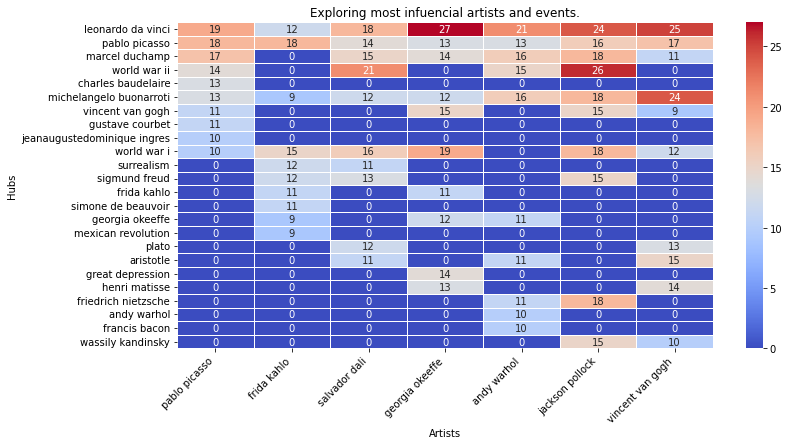

In [56]:
# Prepare the DataFrame
all_connections = {}
for artist, connections in artist_to_hub_mapping.items():
    for connection, value in connections:
        if connection not in all_connections:
            all_connections[connection] = {}
        all_connections[connection][artist] = value

# Create DataFrame with NaN for missing values
df = pd.DataFrame(all_connections).T.fillna(0)

# Visualize the matrix as a heatmap
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Exploring most infuencial artists and events.')
plt.xlabel('Artists')
plt.ylabel('Hubs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()